### 0. Опис задачі та підготовка данних

Для роботи було взято набір данних з 9999 найпопулярнішими піснями в період 1960-их по наші дні.

Ця робота розділена на дві частини. У першій частині я поставив деякі прості запитання, на які дам відповіді застосувавши Python. У другій частині я поставив за мету знайти чи залежить популярість пісні від її характеристик таких як мелодійність, акустичність, тональність тощо. Звичайно, щоб визначити таку задежнісьт потрібно врахувати набагато більше факторів таких як час випуску пісні, події що відбувалися у світі і тому подібне, тому всі висновки, що будуть зроблені у ході цієї частини це лише гіпотези.


Викличемо необхідні бібліотеки

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [285]:
# Зчитаємо файл із данними
df = pd.read_csv("top_10000_1960-now.csv")

In [286]:
# Перегляньмо данні
df.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [287]:
# Деякі із колонок ми не будемо використовувати, тому саме їх і видалимо

columns_to_drop_index = [0, 2, 4, 6, 9, 10, 11, 13, 16, 17, 18, -1, -3, -4]
df.drop(df.columns[columns_to_drop_index], axis=1, inplace=True)


In [288]:
# Деякі із назв пісень або виконавців мають значення NaN, тому кращу від них позбутися

df = df.dropna(subset=["Track Name"])
df = df.dropna(subset=["Artist Name(s)"])

Опис датасету (зменні які містить датасет):
    

   * Track Name - назва пісні
   * Artist Name(s) - назва виконавця/виконавців пісні
   * Album Name - назва альбому
   * Album Artist Name(s) - назва виконавця/виконавців що випустив/ли альбом
   * Album Release Date - дата випуску альбому
   * Track Duration (ms) - тривалість пісні в мілісекундах
   * Explicit - булева змінна, чи є пісня відвертою/з віковим обмеженням
   * Popularity - рівень популярності 
   * Artist Genres - жанри в яких працював виконавець
   * Danceability - танцювальність
   * Energy - енергійність
   * Key - тональність (змінна є категоріальною, де 0 - це С, 1 - С#, і так далі до 11 - В)
   * Loudness - гучність
   * Mode - музичний лад (0 - мінор, 1 - мажор)
   * Speechiness - говірливість
   * Acousticness - акустичність
   * Instrumentalness - інструментільність
   * Liveness - жвавість
   * Valence - позитивність
   * Tempo - темп, bpm, кількість ударів в хвилину
   * Label - лейбл, що випустив пісню


### 1. Деякі прості запитання

#### 1.1 Яка пісня є найдовшою та найкоротшою? Візуалізація продовжуваності пісень у вигляді гістограми.

Для початку виконаємо конвертацію мілісекунт у секунди і перейменуймо колонку з данними

In [289]:
df["Track Duration (ms)"] = df["Track Duration (ms)"]/1000
df.rename(columns = {"Track Duration (ms)": "Track Duration (sec)"}, inplace=True)

Знайдемо найдовшу та найкоротшу пісні

In [290]:
df.loc[df['Track Duration (sec)'].idxmin()]


Track Name              United States Of Whatever
Artist Name(s)                         Liam Lynch
Album Name                             Fake Songs
Album Artist Name(s)                   Liam Lynch
Album Release Date                     2003-01-01
Track Duration (sec)                       91.226
Explicit                                    False
Popularity                                     54
Artist Genres                             novelty
Danceability                                0.452
Energy                                      0.817
Key                                           7.0
Loudness                                    -2.27
Mode                                          1.0
Speechiness                                 0.273
Acousticness                              0.00383
Instrumentalness                              0.0
Liveness                                    0.138
Valence                                     0.867
Tempo                                     161.362


In [291]:
df.loc[df['Track Duration (sec)'].idxmax()]

Track Name                        Tubular Bells - Pt. I
Artist Name(s)                            Mike Oldfield
Album Name                                Tubular Bells
Album Artist Name(s)                      Mike Oldfield
Album Release Date                           1973-02-01
Track Duration (sec)                           1561.133
Explicit                                          False
Popularity                                           52
Artist Genres           progressive rock,symphonic rock
Danceability                                      0.374
Energy                                            0.219
Key                                                 4.0
Loudness                                        -19.104
Mode                                                0.0
Speechiness                                      0.0343
Acousticness                                      0.564
Instrumentalness                                   0.56
Liveness                                        

Побудуймо гістограму того як розподілена тривалість пісень

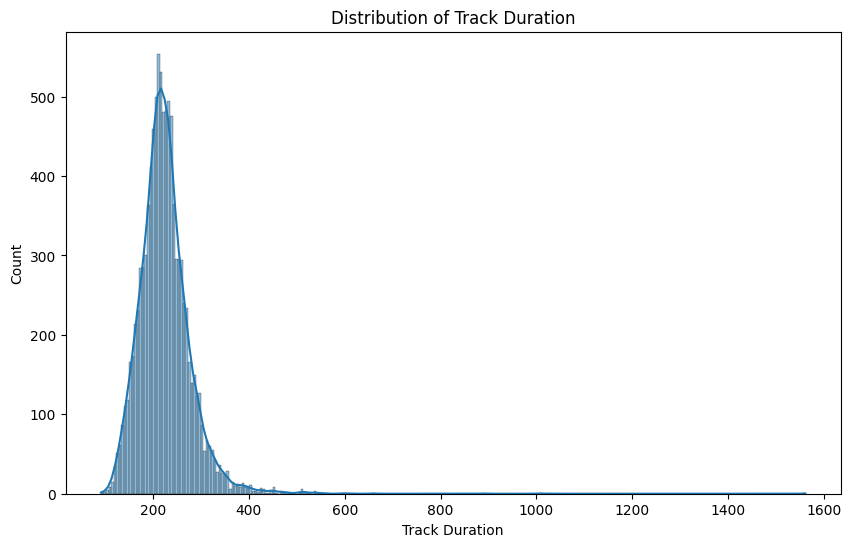

In [292]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Track Duration (sec)'], kde=True)
plt.title('Distribution of Track Duration')
plt.xlabel('Track Duration')
plt.ylabel('Count')
plt.show()

#### 1.2 Якими є мода, медіана, та середнє арифметичне тривалості пісень?

In [293]:
df['Track Duration (sec)'].mode()

0    208.106
1    227.266
Name: Track Duration (sec), dtype: float64

In [294]:
df['Track Duration (sec)'].median()

219.913

In [295]:
df['Track Duration (sec)'].mean()

224.83745639127827

Можна помітити що оцінки центрального положення є майже одними й тими самими.

#### 1.3 Яка частина пісень є з віковим обмеженням? Результат зобразити у вигляді кругової діаграми.

In [296]:
explicit_T = len(df[df["Explicit"]==True])
explicit_F = len(df[df["Explicit"]==False])
explicit_total = len(df["Explicit"])
print("Відсоток пісень з віковим обмеженням", round((explicit_T/explicit_total)*100, 2), "% , відсоток пісень без вікового обмеження", round((explicit_F/explicit_total)*100, 2), "%")

Відсоток пісень з віковим обмеженням 5.09 % , відсоток пісень без вікового обмеження 94.91 %


Зобразимо результат на круговій діаграмі.

([<matplotlib.patches.Wedge at 0x18ac48ccb90>,
 [Text(1.0859606903622512, 0.17518384339870766, 'Explicit'),
  Text(-1.0859606862617772, -0.17518386881745177, 'Not explicit')],
 [Text(0.5923421947430461, 0.09555482367202235, '5.1%'),
  Text(-0.5923421925064238, -0.09555483753679186, '94.9%')])

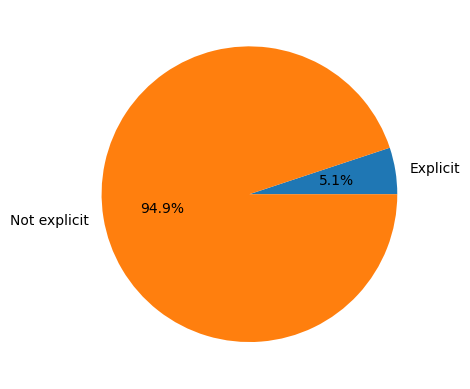

In [297]:
labels = 'Explicit', 'Not explicit'
sizes = [explicit_T, explicit_F]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

#### 1.4 Зобразити розподіл пісень за швидкістю програвання/ за bpm за знайти оцінки цетрального положення?

In [298]:
# Створимо тимчасовий датафрейм, де не буде пісень без значень швидкості

df_temporary = df[df["Tempo"]!=0]

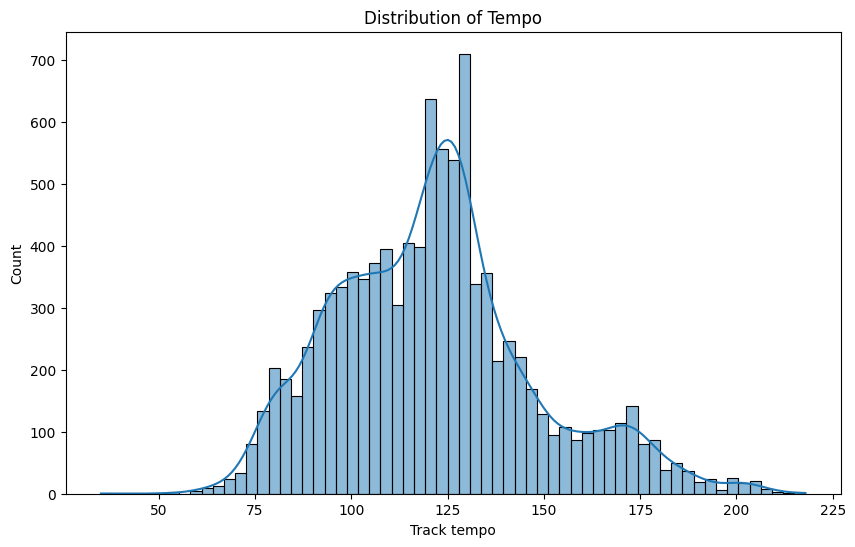

In [299]:
# Визначимо категорії на які будемо ділити пісні

plt.figure(figsize=(10, 6))
sns.histplot(df_temporary['Tempo'], kde=True)
plt.title('Distribution of Tempo')
plt.xlabel('Track tempo')
plt.ylabel('Count')
plt.show()


In [300]:
df_temporary['Tempo'].mode()

0    120.032
1    125.983
2    127.960
3    129.998
Name: Tempo, dtype: float64

In [301]:
df_temporary['Tempo'].median()

120.675

In [302]:
df_temporary['Tempo'].mean()

121.51055417708855

#### 1.5 Якими є 10 виконавців з найбільшою кількістю пісень у цьому топі?

In [303]:
# Визначимо 10 виконавців з найбільшою кількість пісень у цьому топі
top_artists = df['Artist Name(s)'].value_counts().nlargest(10)
top_artists

Artist Name(s)
Taylor Swift          48
P!nk                  45
Elvis Presley         42
Ed Sheeran            40
U2                    39
The Beatles           39
Madonna               39
The Rolling Stones    33
Queen                 31
INXS                  30
Name: count, dtype: int64

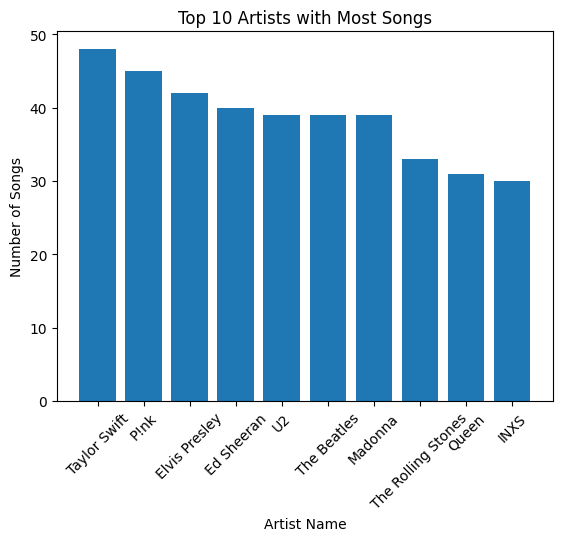

In [304]:
# Побудуймо стовпчикову діаграму для наглядності

fig, ax = plt.subplots()
ax.bar(top_artists.index, top_artists)
plt.xticks(rotation=45)
plt.title('Top 10 Artists with Most Songs')
plt.xlabel('Artist Name')
plt.ylabel('Number of Songs')
plt.show()

#### 1.6 Якими є 10 лейблів які випустили найбільше пісень у цьому топі?

In [305]:
# Визначимо 10 виконавців з найбільшою кількість пісень у цьому топі
top_labels = df['Label'].value_counts().nlargest(10)
top_labels

Label
Universal Music Group                  840
Columbia                               454
RCA Records Label                      302
Sony Music Entertainment               282
Universal Music Australia Pty. Ltd.    275
WM Australia                           259
Parlophone UK                          237
Capitol Records                        214
Epic                                   203
Warner Records                         175
Name: count, dtype: int64

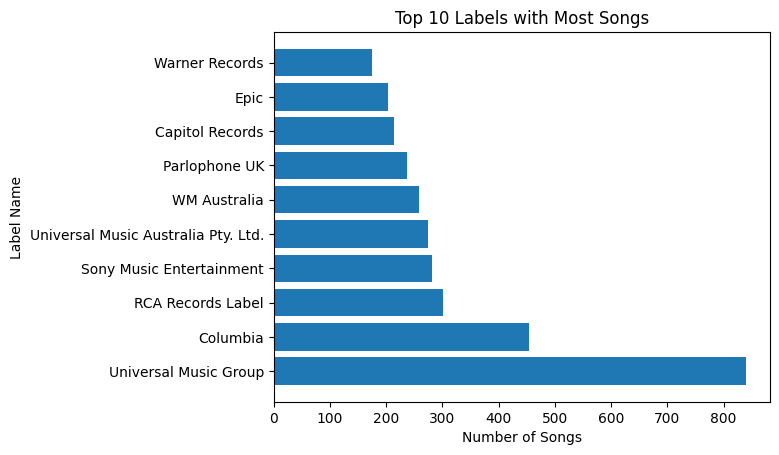

In [306]:
# Побудуймо горизонтальну стовпчикову діаграму для наглядності

fig, ax = plt.subplots()
ax.barh(top_labels.index, top_labels)
plt.title('Top 10 Labels with Most Songs')
plt.ylabel("Label Name")
plt.xlabel('Number of Songs')
plt.show()

#### 1.7 Якими є 10 виконавців з найбільшою кількістю пісень, що були випущені в нульові, у цьому топі?

In [307]:
# Створимо тимчасовий датафрейм для рядків із піснями нульових

temp_df = df[(df['Album Release Date'] >= '2000-01-01') & (df['Album Release Date'] <= '2009-12-31')]

In [308]:
# Визначимо 10 виконавців з найбільшою кількість пісень, що були випущені в нульові, у цьому топі

top_artists_2000s = temp_df['Artist Name(s)'].value_counts().nlargest(10)
top_artists_2000s

Artist Name(s)
P!nk               22
Black Eyed Peas    21
Madonna            21
Eminem             18
Britney Spears     17
Kelly Clarkson     16
Nickelback         15
Powderfinger       15
Foo Fighters       15
U2                 14
Name: count, dtype: int64

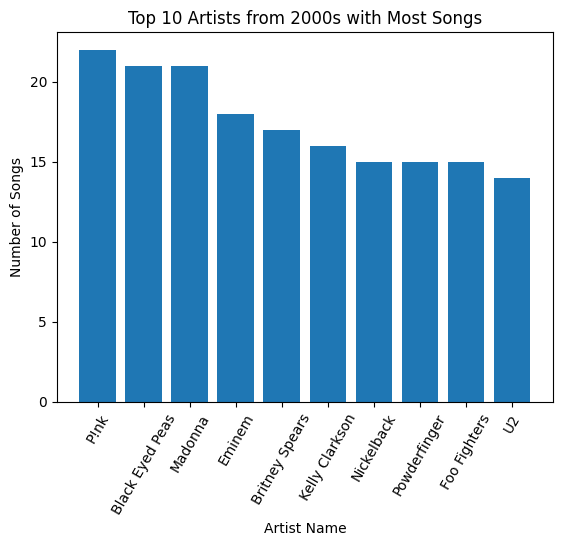

In [309]:
# Побудуймо стовпчикову діаграму для наглядності

fig, ax = plt.subplots()
ax.bar(top_artists_2000s.index, top_artists_2000s)
plt.xticks(rotation=60)
plt.title('Top 10 Artists from 2000s with Most Songs')
plt.xlabel('Artist Name')
plt.ylabel('Number of Songs')
plt.show()

### 2. Чи залежить популярість пісні від деяких її характеристик?

Для початку виконаємо первинний огляд данних і оцінимо те з чим ми маємо справу. 

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track Name            9998 non-null   object 
 1   Artist Name(s)        9998 non-null   object 
 2   Album Name            9998 non-null   object 
 3   Album Artist Name(s)  9996 non-null   object 
 4   Album Release Date    9996 non-null   object 
 5   Track Duration (sec)  9998 non-null   float64
 6   Explicit              9998 non-null   bool   
 7   Popularity            9998 non-null   int64  
 8   Artist Genres         9449 non-null   object 
 9   Danceability          9996 non-null   float64
 10  Energy                9996 non-null   float64
 11  Key                   9996 non-null   float64
 12  Loudness              9996 non-null   float64
 13  Mode                  9996 non-null   float64
 14  Speechiness           9996 non-null   float64
 15  Acousticness          9996

Перелік стовпців, що будуть задіяні надалі:
* Числові(11) - Track Duration (sec), Danceability, Energy, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Popularity.
* Булеві(2) - Explicit, Mode.
* Категоріальні(1) - Key. 
* Інше(1) - Album Release Date 

Отже, усього 15 колонок буде задіяно.

In [311]:
# для початку приведімо до потрібного формату стовбець із датами

df['Album Release Date'] = pd.to_datetime(df['Album Release Date'], errors='coerce')

In [312]:
# У стовбці із данними про популярність треку присутня величезна кількість нулів, що приведе до не коректних значень для нашого дослідження
# створімо новий тимчасовий датафрейм із рядків де визначена популярність

temp_df = df[df['Popularity']!=0]

In [313]:
# Візьмемо саме ті колонки що будуть задіяні для дослідження кореляції

data_for_corr = temp_df.loc[:, ['Track Duration (sec)', 'Danceability', 'Energy', 'Loudness', 
                              'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 
                              'Valence', 'Tempo', 'Popularity', 'Explicit', 
                              'Mode', 'Key', 'Album Release Date']]

<Axes: >

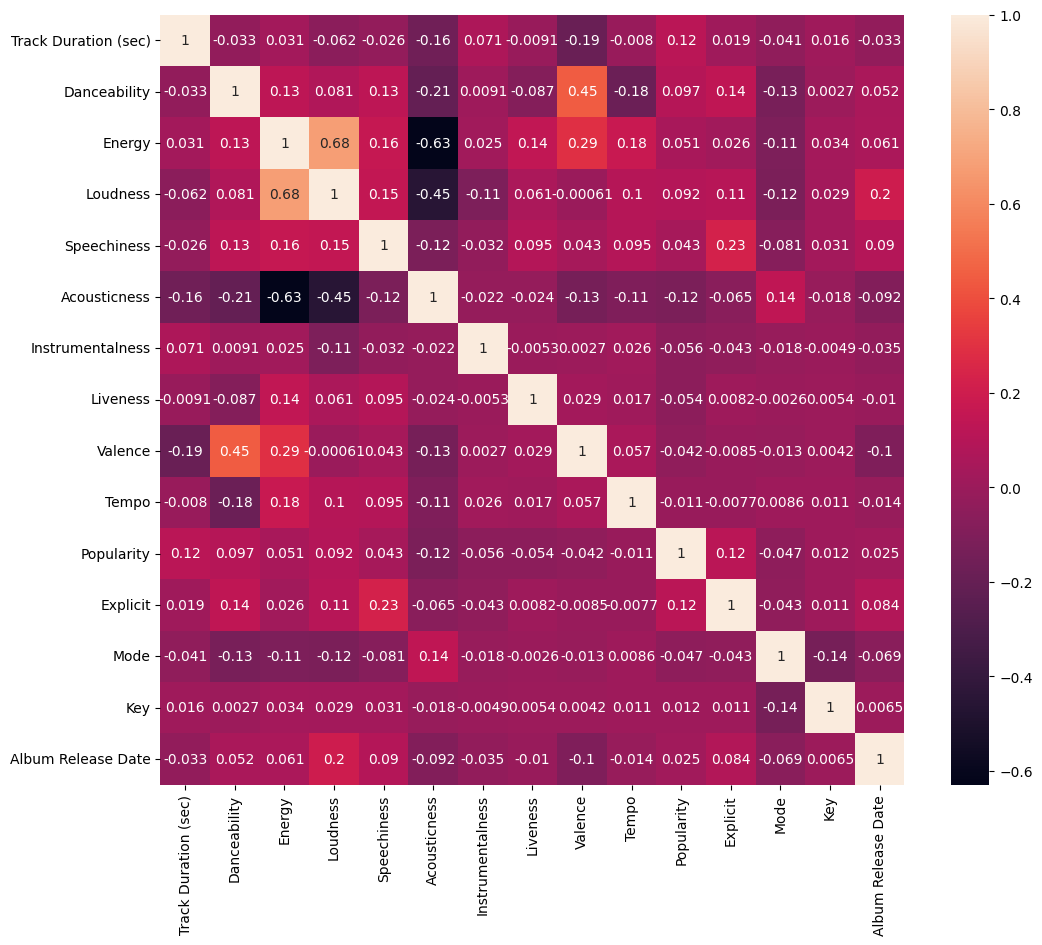

In [314]:
# Побудуймо кореляційну матрицю та зобразімо її графічно

temp_corr = data_for_corr.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(temp_corr, annot=True)

In [315]:
# Погляньмо на данні про кореляцію попурності до інших характеристик

pd.DataFrame(temp_corr.iloc[-5,:])

,Popularity
Track Duration (sec),0.116266
Danceability,0.096674
Energy,0.050753
Loudness,0.091945
Speechiness,0.042709
Acousticness,-0.115214
Instrumentalness,-0.056344
Liveness,-0.054209
Valence,-0.042445
Tempo,-0.010842


#### Висновки

Отже, побудувавши кореляційну матрицю можна вивести такі гіпотези щодо пісень:
* Танцювальність має значну залежність із позитивністю пісень, що загалом є логічно
* Енергійність має кілька цікавих залежностей, а саме те, що є позитивна кореляція із гучністю пісень, негативна кореляція із акустичністю та позитивна кореляція із позитивністю
* Також присутня від'ємна кореляція гучності з акустичністю
* Є не велика кореляція говірливості із тим фактом чи є вікові обмеження (можливо на це повпливав американський реп дев'яностих)

Загалом вище перераховані результати є доволі логічними та до яких можна без досліджень здогадатися, адже є закономірним той факт, що якщо музика енергійна, то під неї хочеться танцювати. 

Повертаючись до основного питання,  чи залежить популярість пісні від деяких її характеристик, то результат є не дуже переконливим. Ця характеристика майже не корелює з іншими колонками, проте були помічені кілька слабких залежностей в акустичності, продовжуваності та фактом наявності вікових обмежень. Можна вивести гіпотези:
* При збільшенні рівня акустичності популярність буде падати
* При збільшенні довготривалості пісні, популярність збільшиться
* Якщо будуть присутні вікові обмеження, то популярність буде рости.

Щодо останнього, то в дев'яності в США, коли на пісні почали вішати попередження, такі як "Parental Advisory", очікувалось зниження попиту на попупку цих пісень, проте сталося навпаки та популярність пісень виросла.

Тому 2-га гіпотеза щодо популярності має місце через історичне підґрунтя.